# Expectations of test functions

The expected value of a function $\phi(X): \mathcal{X} \rightarrow \mathcal{R}$ is defined as

$$
E[\phi(X)] = \int  \phi(X) p(X) dx
$$

* Data distribution: $p(X)$
* Test function: $\phi(X)$

Intuitively, this is the average value that the function $\phi$ take when given random inputs $X$ with a distribution of $p(X)$. 

Some test functions are special

# Mean

$\phi(X) = X$

$$
E[X] = \int p(X) X dx = \int X \mu(dx)
$$



# Variance

$\phi(X) = (X - E[X])^2$

$$
Var[X] = E[(X - E[X])^2] = \int p(X) (X - E[X])^2 dx
$$


# Covariance

Data distribution: $p(X, Y)$

$$
\phi = (X-E[X])(Y - E[Y])
$$

$$
Cov[X,Y] = E[(X-E[X])(Y - E[Y])]
$$



# Correlation Coefficient

$$
\rho(X,Y) = \frac{Cov[X,Y]}{\sqrt{Var[X]Var[Y]}}
$$

$$
-1 \leq \rho\leq 1
$$

# Emprical distributions

Suppose we are given a dataset $X = \{x_1, x_2, \dots, x_N\}$

$$
\tilde{p}(x) = \frac{1}{N}\sum_{i=1}^N \delta(x - x_i)
$$

## Emprical bivariate distribution

Dataset of pairs $X = \{(x_1,y_1), (x_2,y_2), \dots, (x_N, y_N)\}$

$$
\tilde{p}(x, y) = \frac{1}{N}\sum_{i=1}^N \delta(x - x_i)\delta(y - y_i)
$$


# Sample average and sample variance

Compute expectations with respect to the emprical distribution

$$
E[x] = \int x \tilde{p}(x) dx = \int x \frac{1}{N}\sum_{i=1}^N \delta(x - x_i) dx = \frac{1}{N}\sum_{i=1}^N x_i \equiv s_1/N
$$

$$
Var[x] = \int (x-E[x])^2 \tilde{p}(x) dx = E[x^2] - m^2 = \frac{1}{N}\sum_{i=1}^N x^2_i - \frac{1}{N^2}s_1^2 \equiv
\frac{1}{N}s_2 - \frac{1}{N^2}s_1^2
$$

Here, $s_1 = \sum_{i=1}^N x_i$ and $s_2 = \sum_{i=1}^N x_i^2$ are known as the first and second (sample) moments, respectively.


# Generative models

<img src='pharma2.jpg' width=200 align='left' caption='Image: www.pharmamanufacturing.com'>

A generative model is a computational procedure with random inputs that describes how to simulate a dataset $X$. The model  defines a joint distribution of the variables of the dataset and possibly additional hidden (unobserved) variables and parameters $H$ to aid the data generation mechanism, denoted as $p(X, H)$.

A new terminology for a generative model is a _probabilistic program_.

Given a generative model and a dataset, the posterior distribution over the hidden variables can be computed via Bayesian inference $P(H|X)$. The hidden variables and parameters provide explanations for the observed data.  

## Generative Model Example

\begin{eqnarray}
w & \sim & \mathcal{U}(0,1) \\
u & = & \cos(2\pi w) 
\end{eqnarray}

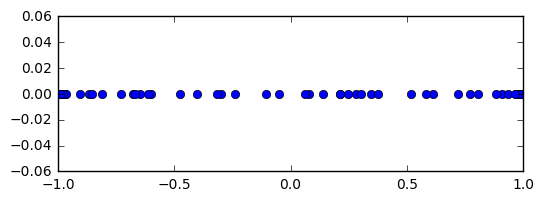

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

N = 50
u = np.cos(2*np.pi*np.random.rand(N))

plt.figure(figsize=(6,2))
plt.plot(u, np.zeros_like(u), 'o')
plt.show()


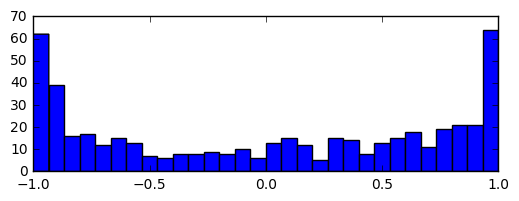

In [3]:
N = 500
u = np.cos(2*np.pi*np.random.rand(N))

plt.figure(figsize=(6,2))
plt.hist(u, bins=30)
plt.show()


## Generative Model Example 

\begin{eqnarray}
w & \sim & \mathcal{U}(0,1) \\
u & = & \cos(2\pi w) \\
e & \sim & \mathcal{N}\left(0, (\sigma u)^2 \left(\begin{array}{cc}  1 & 0\\  0 & 1\\\end{array}\right) \right) \\
x & \sim & \left(\begin{array}{c} \theta_1 \\ \theta_2 \end{array} \right)u + e
\end{eqnarray}

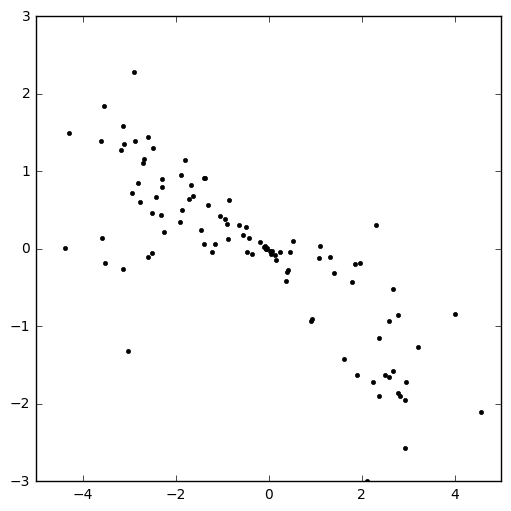

In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

N = 100
sigma = 0.8
theta = np.mat([3,-1]).T

u = np.cos(2*np.pi*np.random.rand(1,N))
X = theta*u
X = X + sigma*u*np.random.randn(X.shape[0],X.shape[1])

plt.figure(figsize=(6,6))
plt.plot(X[0,:],X[1,:],'k.')

plt.show()

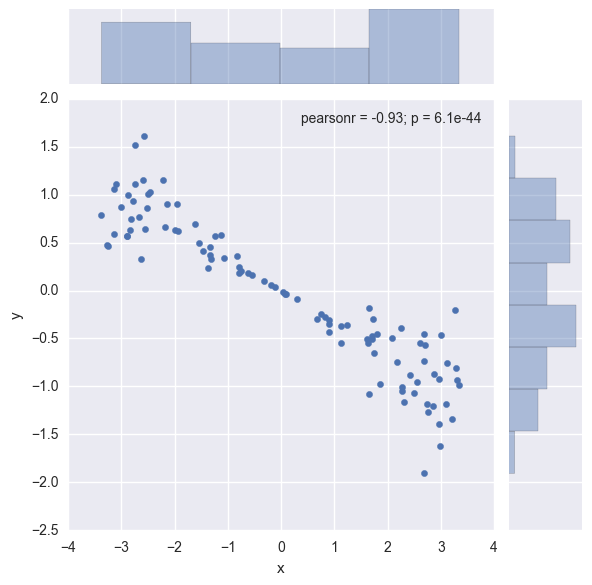

In [71]:
import seaborn as sns
import pandas as pd

sns.set(color_codes=True)
plt.figure(figsize=(5,5))
df = pd.DataFrame(X.T, columns=['x','y'])
sns.jointplot(x="x", y="y", data=df);
plt.show()


## Generative Model Example

\begin{eqnarray}
w & \sim & \mathcal{U}(w; 0,2\pi) \\
\epsilon & \sim & \mathcal{N}(\epsilon; 0, I) \\
u & = & \left(\begin{array}{c} \mu_1 \\  \mu_2 \end{array}\right) + \left(\begin{array}{cc} s_1 & 0 \\ 0& s_2 \end{array}\right) \left(\begin{array}{c} \cos(w) \\  \sin(w) \end{array}\right) +  \left(\begin{array}{cc} \sigma_1 & 0 \\ 0& \sigma_2 \end{array}\right)  \left(\begin{array}{c} \epsilon_1 \\  \epsilon_2 \end{array}\right)
\end{eqnarray}

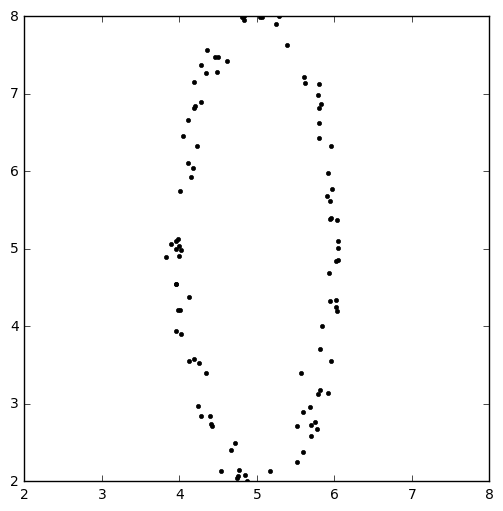

4.339 3.397
4.427 2.715
4.834 7.959
5.960 5.405
4.399 2.843
3.955 3.937
4.253 3.530
3.895 5.062
4.203 6.844
6.040 5.009
4.535 2.141
5.240 7.906
4.770 2.150
4.340 7.272
5.955 3.556
4.278 7.369
6.048 5.106
6.029 5.371
4.022 3.899
4.801 7.996
4.716 2.492
3.987 4.206
5.038 7.996
5.814 3.704
5.793 3.132
5.940 5.381
5.610 7.223
5.390 7.636
5.833 6.865
4.106 6.110
5.799 7.135
4.002 4.206
4.179 6.038
4.412 2.743
4.852 2.077
4.243 2.979
5.807 3.175
3.961 5.003
4.002 5.743
3.996 4.909
4.837 8.000
5.289 7.999
5.695 2.588
3.958 4.544
4.461 7.481
4.867 2.002
4.491 7.287
5.779 2.675
4.153 5.931
4.050 6.452
4.500 7.483
5.941 4.332
3.961 4.552
5.800 6.825
4.226 6.327
4.274 6.897
5.615 7.141
5.969 5.767
5.952 6.329
5.520 2.257
5.569 3.399
6.028 4.203
4.129 4.382
4.281 2.840
4.118 3.558
4.616 7.426
3.953 5.098
5.594 2.900
5.908 5.678
4.183 7.150
5.946 5.621
5.519 2.715
5.749 2.764
5.917 3.147
6.016 4.345
6.020 4.254
5.681 2.958
4.112 6.658
3.829 4.898
4.023 4.990
6.024 4.838
5.912 5.979
4.184 3.582
3.99

In [23]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

N = 100
sigma_1 = 0.1
sigma_2 = 0.0
mu_1 = 5
mu_2 = 5
s_1 = 1
s_2 = 3

w = 2*np.pi*np.random.rand(1,N)

u1 = mu_1 + s_1*np.cos(w) + sigma_1*np.random.randn(1,N) 
u2 = mu_2 + s_2*np.sin(w) + sigma_2*np.random.randn(1,N)

plt.figure(figsize=(6,6))
plt.plot(u1, u2,'k.')
plt.axis('equal')
plt.show()

for i in range(N):
    print('%3.3f %3.3f' % (u1[0,i],u2[0,i] ))

## Generative Model Example

\begin{eqnarray}
w & \sim & \mathcal{U}(0,1) \\
u & = & 2 w - 1 \\
x|u & \sim & \mathcal{N}\left(x; u^2, r \right) 
\end{eqnarray}


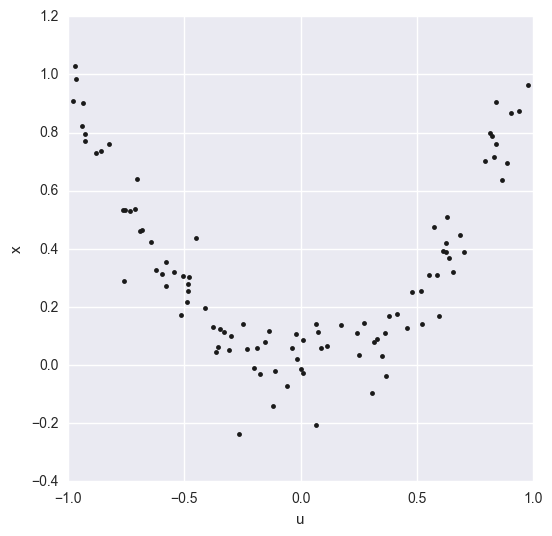

In [104]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

N = 100
r = 0.01

u = 2*np.random.randn(1,N)-1
x = u**2 + np.sqrt(r)*np.random.randn(1,N)

plt.figure(figsize=(6,6))
plt.plot(u,x,'k.')
plt.xlabel('u')
plt.ylabel('x')
plt.show()

## Generative Model Example (Principal Components Analysis)

$h \in \mathbb{R}^{D_h}$, $x \in \mathbb{R}^{D_x}$, $A \in \mathbb{R}^{{D_x}\times {D_h}}$, $r\in \mathbb{R}^+$

\begin{eqnarray}
h & \sim & {\mathcal N}(h; 0, I) \\
x|h & \sim & {\mathcal N}(x; A h, rI)
\end{eqnarray}


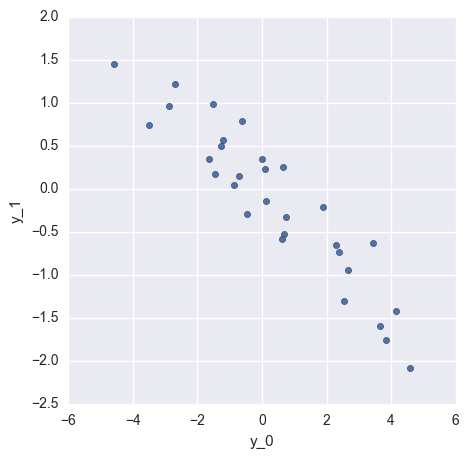

In [88]:
%matplotlib inline

from IPython.display import display, Math, Latex
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from notes_utilities import pnorm_ball_points
from notes_utilities import mat2latex

import pandas as pd
import seaborn as sns


# Number of points
N = 30

# Parameters 
A = np.mat('[3;-1]')
r = 0.1
Dh = 1
Dx = 2

h = np.random.randn(Dh, N)
y = A*h + np.sqrt(r)*np.random.randn(Dx, N)
#sns.jointplot(x=y[0,:], y=y[1,:]);
plt.figure(figsize=(5,5))
plt.scatter(y[0,:],y[1,:])
plt.xlabel('y_0')
plt.ylabel('y_1')
plt.show()

## Example

Generate a data set as follows

\begin{eqnarray}
x & \sim & {\mathcal N}(x; 0, 1) \\
y|x & \sim & {\mathcal N}(a x, R)
\end{eqnarray}

How is this model related to the PCA?

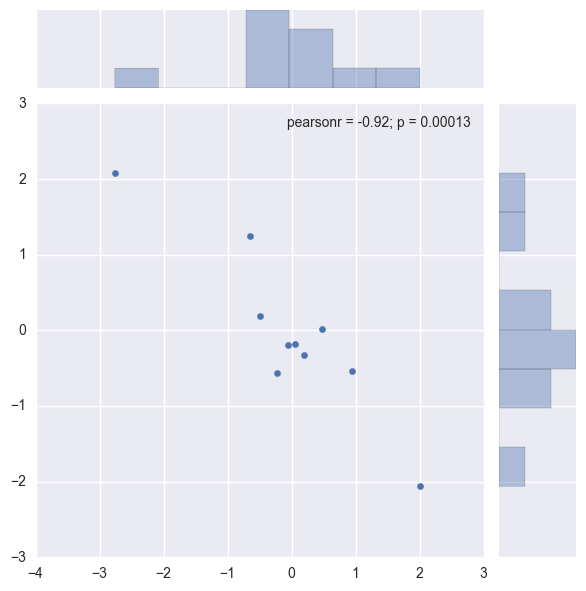

In [81]:
%matplotlib inline

from IPython.display import display, Math, Latex
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from notes_utilities import pnorm_ball_points
from notes_utilities import mat2latex

import pandas as pd
#import seaborn as sns
#sns.set(color_codes=True)


# Number of points
N = 10

# Parameters 
a = -0.8
R = 0.1

x = np.random.randn(N)
y = a*x + np.sqrt(R)*np.random.randn(N)
sns.jointplot(x=x, y=y);


We can work out the joint distribution as:

\begin{eqnarray}
\left(\begin{array}{c}  x \\  y \end{array}\right) \sim
\mathcal{N}\left( \left(\begin{array}{c}  0 \\ 0 \end{array}\right) , 
\left(\begin{array}{cc}  1 & a\\  a & a^2 + R \end{array}\right)
\right)
\end{eqnarray}


True Covariance


<IPython.core.display.Math object>

<IPython.core.display.Math object>

The ML Estimates from Data


<IPython.core.display.Math object>

<IPython.core.display.Math object>

The estimate when we assume that we know the true mean


<IPython.core.display.Math object>

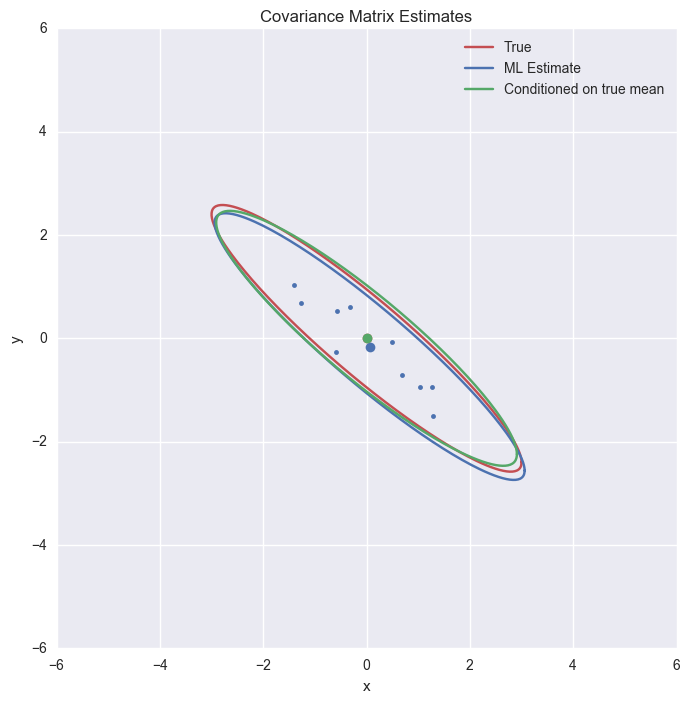

In [107]:
%matplotlib inline

from IPython.display import display, Math, Latex
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from notes_utilities import pnorm_ball_points
from notes_utilities import mat2latex

import pandas as pd
#import seaborn as sns
#sns.set(color_codes=True)


# Number of points
N = 10

# Parameters 
a = -0.8
R = 0.1

# Theoretical Covariance
Cov = np.mat([[1,a],[a, a**2+R]])

x = np.random.randn(N)
y = a*x + np.sqrt(R)*np.random.randn(N)


np.set_printoptions(precision=4)

X = np.c_[x,y].T
N = X.shape[1]

print('True Covariance')
display(Math(r'\mu='+mat2latex(np.mat('[0;0]'))))
display(Math(r'\Sigma='+mat2latex(Cov)))

print('The ML Estimates from Data')
mean_est = np.mean(X,axis=1,keepdims=True)
cov_est = np.cov(X,bias=True)
display(Math(r'\bar{m}='+mat2latex(mean_est)))
display(Math(r'\bar{S}='+mat2latex(cov_est)))


print('The estimate when we assume that we know the true mean')
cov2_est = X.dot(X.T)/N
display(Math(r'\bar{\Sigma}='+mat2latex(cov2_est)))

plt.figure(figsize=(8,8))
plt.plot(x, y, '.')
ax = plt.gca()
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

# True mean and Covariance
dx,dy = pnorm_ball_points(3*np.linalg.cholesky(Cov))
ln = plt.Line2D(dx,dy, color='r')
ln.set_label('True')
ax.add_line(ln)
ln = plt.Line2D([0],[0], color='r', marker='o')
ax.add_line(ln)

dx,dy = pnorm_ball_points(3*np.linalg.cholesky(Cov), mu=mean_est)
ln = plt.Line2D(dx,dy, color='b')
ln.set_label('ML Estimate')
ax.add_line(ln)
ln = plt.Line2D(mean_est[0],mean_est[1], color='b', marker='o')
ax.add_line(ln)


# Estimate conditioned on knowing the true mean
dx,dy = pnorm_ball_points(3*np.linalg.cholesky(cov2_est))
ln = plt.Line2D(dx,dy, color='g')
ln.set_label('Conditioned on true mean')
ax.add_line(ln)
ln = plt.Line2D([0],[0], color='g', marker='o')
ax.add_line(ln)

Lim = 6
ax.set_ylim([-Lim,Lim])
ax.set_xlim([-Lim,Lim])

ax.legend()
plt.title('Covariance Matrix Estimates')
plt.show()


## Frequentist approach to statistics

* Assume there is a true parameter that we don't know. For example the covariance $\Sigma$
* Construct an estimator (=a function that spits out a parameter value given data)
$$
\bar{\Sigma} = X^\top X/N
$$
* (Conceptually) sample new random dataset from the same distribution for $i=1\dots K$
$$
X^{(i)} \sim p(X)
$$
* Study the distribution of the estimator -- the output of the estimator is random as input data is random
$$
\bar{\Sigma}^{(i)} = {X^{(i)}}^\top X^{(i)}/N
$$


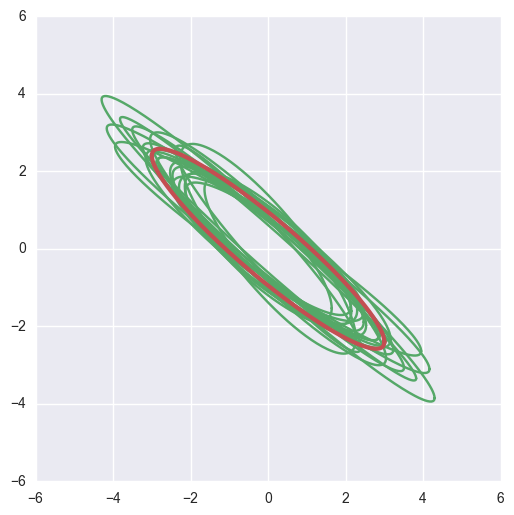

In [76]:
EPOCH = 20

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
Lim = 6
ax.set_ylim([-Lim,Lim])
ax.set_xlim([-Lim,Lim])

for i in range(EPOCH):
    x = np.random.randn(N)
    y = a*x + np.sqrt(R)*np.random.randn(N)
    X = np.c_[x,y].T
    cov2_est = X.dot(X.T)/N
    dx,dy = pnorm_ball_points(3*np.linalg.cholesky(cov2_est))
    ln = plt.Line2D(dx,dy, color='g')
    ax.add_line(ln)

dx,dy = pnorm_ball_points(3*np.linalg.cholesky(Cov))
ln = plt.Line2D(dx,dy, color='r', linewidth=3)
ax.add_line(ln)

plt.show()

Every green ellipse corresponds to an estimated covariance $\Sigma^{(i)}$ from each new dataset $X^{(i)}$ sampled from the data distribution. The picture suggests that the true covariance could be somehow obtained as the average ellipse.

An estimator is called unbiased, if the true parameter is exactly the expected value of the estimator. Otherwise, the estimator is called biased.

The variance of the estimator is the amount of fluctuation around the mean. Ideally, we wish it to be small, in fact zero. However, obtaining a zero variance turns out to be impossible when the bias is zero. The variance is always greater or equal to a positive quantity called the Cramer-Rao bound.


## Bootstrap

In practice, we have only a single dataset, so we need to approximate the data distribution $p(X)$. The effect of sampling new datasets can be done by sampling data points with replacement. This procedure is known as the bootstrap.

Below, we use a dataset of $M+N$ 

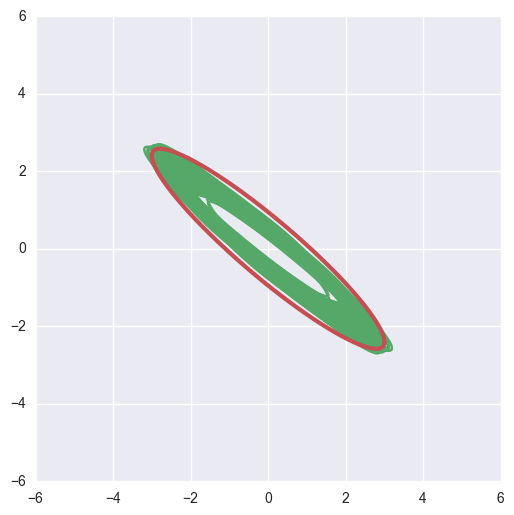

In [77]:
EPOCH = 100
M = N

x = np.random.randn(N+M)
y = a*x + np.sqrt(R)*np.random.randn(N+M)

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
Lim = 6
ax.set_ylim([-Lim,Lim])
ax.set_xlim([-Lim,Lim])

for i in range(EPOCH):
    idx = np.random.permutation(N+M)
    X = np.c_[x[idx[0:N]],y[idx[0:N]]].T
    cov2_est = X.dot(X.T)/N
    dx,dy = pnorm_ball_points(3*np.linalg.cholesky(cov2_est))
    ln = plt.Line2D(dx,dy, color='g')
    ax.add_line(ln)

dx,dy = pnorm_ball_points(3*np.linalg.cholesky(Cov))
ln = plt.Line2D(dx,dy, color='r', linewidth=3)
ax.add_line(ln)

plt.show()

## Bayesian approach to statistics

- Assume there is only one dataset $X$ -- namely only the one that we have observed
- Postulate a prior for the parameter $p(\Sigma)$
- Compute the posterior $p(\Sigma|X)$

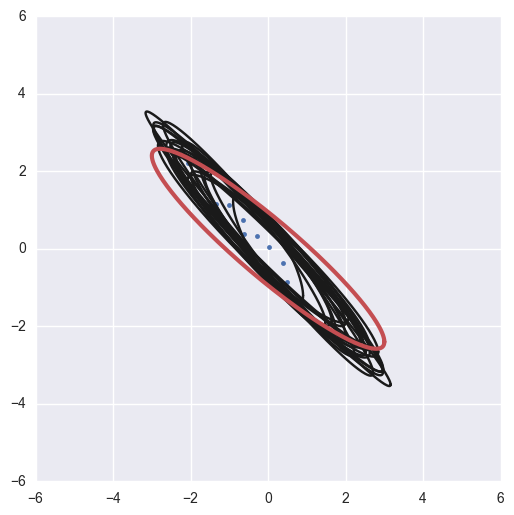

In [67]:
EPOCH = 20

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
Lim = 6
ax.set_ylim([-Lim,Lim])
ax.set_xlim([-Lim,Lim])

x = np.random.randn(N)
y = a*x + np.sqrt(R)*np.random.randn(N)
X = np.c_[x,y].T
cov2_est = X.dot(X.T)/N
W = np.linalg.cholesky(cov2_est)

plt.plot(x,y,'.')

for i in range(EPOCH):
    U = W.dot(np.random.randn(2,N))
    S = U.dot(U.T)/N
    dx,dy = pnorm_ball_points(3*np.linalg.cholesky(S))
    ln = plt.Line2D(dx,dy, color='k')
    ax.add_line(ln)

dx,dy = pnorm_ball_points(3*np.linalg.cholesky(Cov))
ln = plt.Line2D(dx,dy, color='r', linewidth=3)
ax.add_line(ln)

plt.show()

In [46]:
from notes_utilities import mat2latex

print(mat2latex(np.mat([[1,0],[0,1]])))

\left(\begin{array}{cc}  1 & 0\\  0 & 1\\\end{array}\right)
